In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))
    ])

transform = transforms.ToTensor()

mnist_data = datasets.MNIST(root='../data', train=True, download=True, transform=transform)

data_loader = torch.utils.data.DataLoader(dataset=mnist_data,
                                          batch_size=64,
                                          shuffle=True,
                                          pin_memory=True,
                                          num_workers=2)
dataiter = iter(data_loader)
images, labels = dataiter.next()
images.device



device(type='cpu')

In [2]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()        
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128), # (N, 784) -> (N, 128)
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 5) # -> N, 10
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(5, 12),
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [3]:
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")
print(device)


model = Autoencoder()
model = model.to(device) #send weights to gpu before defining optimizer
model.train() #tell network it's in training mode for things like dropout
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr=1e-3, 
                             weight_decay=1e-5)

cpu


In [4]:
print(next(model.parameters()).device)

cpu


Epoch:1, Loss:0.0496
Epoch:2, Loss:0.0432
Epoch:3, Loss:0.0349
Epoch:4, Loss:0.0462
Epoch:5, Loss:0.0362
Epoch:6, Loss:0.0369
Epoch:7, Loss:0.0326
Epoch:8, Loss:0.0339
Epoch:9, Loss:0.0346
Epoch:10, Loss:0.0339


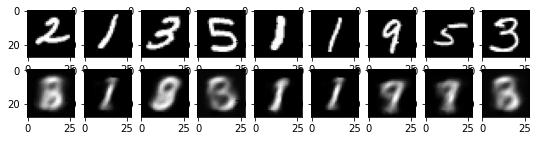

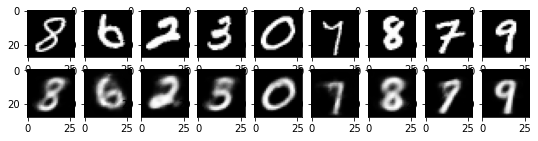

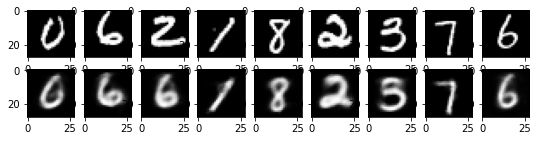

In [5]:
# Point to training loop video
num_epochs = 10
outputs = []
for epoch in range(num_epochs):
    for (img, _) in data_loader:
        img = img.reshape(-1, 28*28) # -> use for Autoencoder_Linear
        img = img.to(device)
        img.device
        recon = model(img)
        loss = criterion(recon, img)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
    outputs.append((epoch, img, recon))

for k in range(0, num_epochs, 4):
    plt.figure(figsize=(9, 2))
    plt.title("AE")    
    plt.gray()
    imgs = outputs[k][1].detach().cpu().numpy()  #added .cpu()
    recon = outputs[k][2].detach().cpu().numpy() #added .cpu()
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2, 9, i+1)
        item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        # item: 1, 28, 28
        plt.imshow(item[0])

            
    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1) # row_length + i + 1
        item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        # item: 1, 28, 28
        plt.imshow(item[0])